In [1]:
# Install necessary libraries
!pip install pandas scikit-learn

In [2]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [3]:
# Load the dataset from a CSV file, handling potential errors during loading
df = pd.read_csv('/urldataset.csv')

In [4]:
# Display the first few rows of the dataset
df.head(15)

,,,,,,,,25,0.009662,0.014354,0.636364,0.708696,0,Unnamed: 6
www.rpg.net/sf/interviews/isaacs99.html,32174,1,1,3,94.000000,94.666667,0.005917,0.011834,0.006135,0.012270,0.704918,0.849673,0,NaN
www.ianm.eclipse.co.uk/colony/,10000000,1,1,2,67.500000,72.000000,0.003571,0.003460,0.003484,0.003378,0.880503,0.711656,0,NaN
www.angelfire.com/rpg/tkmidi/,2547,1,1,2,42.500000,34.500000,0.019048,0.022472,0.020619,0.024691,0.636364,0.638298,0,NaN
www.isomedia.com/homes/crabapple/applegrove.htm,10000000,1,0,5,82.600000,79.400000,0.002410,0.002506,0.002415,0.002513,0.666667,0.705263,0,NaN
thedeepone.tripod.com/game/,1267,1,1,1,951.000000,995.000000,0.001029,0.001970,0.001036,0.001984,0.681818,0.837583,0,NaN
www.angelfire.com/sc/Starrunner/index.html,2547,1,1,4,171.000000,175.750000,0.004267,0.006944,0.004317,0.007022,0.636364,0.735920,0,NaN
www.angelfire.com/rpg/legacyofstrife/,2547,1,1,3,32.666667,26.666667,0.034483,0.040816,0.037037,0.044444,0.636364,0.711538,0,NaN
www.angelfire.com/de/Rudi/main.html,2547,1,1,3,107.666667,109.333333,0.000000,0.000000,0.000000,0.000000,0.636364,0.813370,0,NaN
www.nagrom.net/rpgtales,10000000,0,0,2,41.500000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.696629,0,NaN
drycas.club.cc.cmu.edu/~jae/sw/sw-rpg.html,5956,1,0,6,139.166667,141.333333,0.001170,0.002307,0.001182,0.002331,0.571429,0.788523,0,NaN


In [5]:
# Check for missing values in each column of the DataFrame
df.isnull().sum()

25               0
0.009662         0
0.014354         0
0.636364         0
0.708696         0
0                0
Unnamed: 6    1698
dtype: int64

In [6]:
# Remove columns with names starting with 'Unnamed'
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [7]:
# Verify that columns starting with 'Unnamed' have been removed by checking for missing values again
df.isnull().sum()

25          0
0.009662    0
0.014354    0
0.636364    0
0.708696    0
0           0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'label' is your target variable and the rest are features
X = df.drop('label', axis=1)  # Select all columns except 'label' as features
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [ ]:
# Identify string-based columns
string_columns = X.select_dtypes(include=['object']).columns

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Identify string (object) columns
string_columns = df.select_dtypes(include=['object']).columns

In [ ]:
# Apply Label Encoding or One-Hot Encoding
# Here we use Label Encoding for simplicity, One-Hot Encoding can be used as well
label_encoders = {}
for col in string_columns:
    # Convert the column to string type to ensure uniformity
    df[col] = df[col].astype(str)  #This will convert all values to strings
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
# Split the dataset into features (X) and target (y)
# Assuming the last column is the target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Impute missing values using SimpleImputer
!pip install scikit-learn
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame with potential missing values
imputer = SimpleImputer(strategy='most_frequent')  # Replace missing values with the most frequent value in each column
df_imputed = pd.DataFrame(imputer.fit_transform(df))
df_imputed.columns = df.columns  # Restore column names

# ... (rest of your code, including label encoding, splitting, etc.)

# Split the dataset into features (X) and target (y)
# Assuming the last column is the target variable
X = df_imputed.iloc[:, :-1]
y = df_imputed.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)  # Now fit on imputed data
y_pred_log_reg = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Decision Tree
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
y_pred_dec_tree = dec_tree.predict(X_test)
dec_tree_accuracy = accuracy_score(y_test, y_pred_dec_tree)

In [ ]:
# Display the accuracies
print(f'Logistic Regression Accuracy: {log_reg_accuracy}')
print(f'Decision Tree Accuracy: {dec_tree_accuracy}')

Logistic Regression Accuracy: 0.8153034300791556
Decision Tree Accuracy: 0.9459450076378281


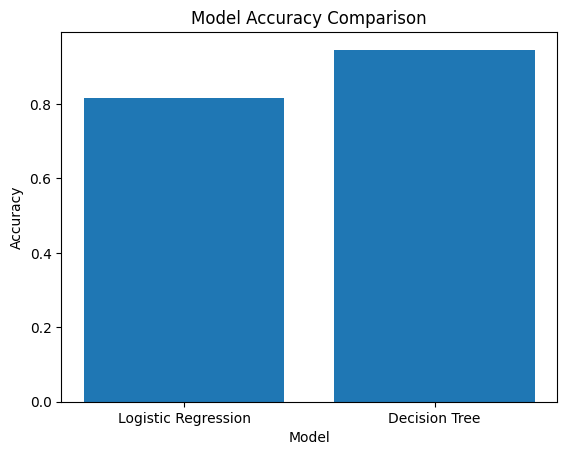

In [ ]:
# prompt: graph

import matplotlib.pyplot as plt

# Prepare data
x = ['Logistic Regression', 'Decision Tree']
y = [log_reg_accuracy, dec_tree_accuracy]

# Plot the bar chart
plt.bar(x, y)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()
